In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from irt import IRTModel
from sklearn import svm
from sklearn.linear_model import SGDRegressor, LinearRegression, BayesianRidge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from beta_irt.visualization.plots import newline
from beta_irt.visualization.plots import plot_parameters
from irt import beta_irt
from sklearn.decomposition import PCA
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from matplotlib import gridspec


# Data set

In [4]:
# Path
path_data = './data/'
path_uci = './data/UCI - 45/'

# Name of data set
name = 'polynomial'

# Read csv
data = pd.read_csv(path_uci + name + '.csv')
data = data.dropna()

Parameters:

In [4]:
rd = 42
noise_std = 16
max_std = 16

## Pre processing

Variable selection:

In [5]:
X = data.iloc[:, 0].values.reshape(-1,1)
y = data.iloc[:, 1]

Split data:

In [6]:
# Split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = rd)

Principal Component Analysis:

In [ ]:
pca = PCA(n_components= 1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

Plot train/test split

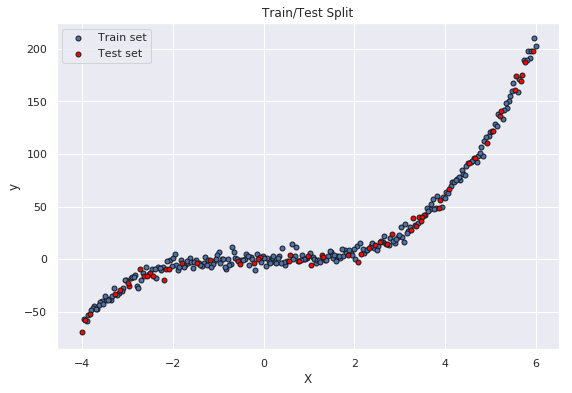

In [7]:
plt.figure(figsize=(9, 6))
plt.scatter(X_train, y_train, label='Train set', s=24, edgecolor='k')
plt.scatter(X_test, y_test, label='Test set', c='red', s=24, edgecolor='k')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Train/Test Split')
plt.legend()
plt.savefig('./Results_IRT/' + name + '/dataset.png')

This part is where data for BIRT models are generated.

In [8]:
# Regression Models
models = [LinearRegression(), BayesianRidge(), svm.SVR(kernel= 'linear'), svm.SVR(kernel = 'rbf', gamma= 'scale', C = 5),\
     KNeighborsRegressor(), DecisionTreeRegressor(), RandomForestRegressor(),\
          AdaBoostRegressor(), MLPRegressor(max_iter=1000, solver= 'lbfgs'), MLPRegressor(hidden_layer_sizes= (50,50), solver = 'lbfgs', max_iter=500, activation='logistic')]

# Generate abilities/parameters for BIRT and other info.
Irt = IRTModel(models= models)
Irt.irtMatrix(X_train = X_train, y_train = y_train, X_test= X_test, y_test= y_test,
              noise_std = noise_std, normalize= True, base_models= True, name= name, rd= rd)

In [9]:
Irt.irt_matrix.head()

,LinearRegression,BayesianRidge,SVR,SVR,KNeighborsRegressor,DecisionTreeRegressor,RandomForestRegressor,AdaBoostRegressor,MLPRegressor,MLPRegressor,Optimal,Average,Worst
203,0.931110,0.929833,0.852534,0.725350,0.858067,0.912436,0.875546,0.775070,0.896080,0.650529,0.931110,0.500040,0.500040
266,0.792666,0.792099,0.783623,0.850157,0.735611,0.850742,0.829374,0.902948,0.798178,0.730583,0.902948,0.500004,0.500004
152,0.626377,0.627332,0.688378,0.859312,0.885285,0.966858,0.925576,0.873358,0.879473,0.823018,0.966858,0.500035,0.500035
9,0.371728,0.372479,0.468809,0.479057,0.906230,0.442886,0.600248,0.704910,0.642700,0.937399,0.937399,0.500098,0.371728
233,0.669031,0.668603,0.631019,0.701998,0.993928,0.924833,0.959671,0.967079,0.998974,0.964140,0.998974,0.500002,0.500002


Plotting limits

In [8]:
xlim = [min(X_test), max(X_test)]
ylim = [min(y_test)- 3*max_std, max(y_test)+ 3*max_std]

# ICC

It is required to run 'betairt_test.py' with the same data generated above.

In [9]:
name = name + '_s' + str(len(y_test)) + '_f' + str(noise_std) + '_sd' + str(rd)

In [12]:
os.chdir('./beta_irt/')
%run -i betairt_test.py {'irt_data_'+ name +'.csv'}
os.chdir('..')

Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.distributions`.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
The TensorFlow Distributions library has moved to TensorFlow Probability (https://github.com/tensorflow/probability). You should update all references to use `tfp.distributions` instead of `tf.

Item-Response Matrix:

In [10]:
path = './beta_irt/results/'
folder = name.split('_')[0] + '/'
output = './Results_IRT/'+ folder+ 'noise_' + name.split('_')[-2][1:] + '/'

In [11]:
irt = pd.read_csv('./beta_irt/irt_data_' + name + '.csv')
error = pd.read_csv('./beta_irt/errors_' + name + '.txt')
X_pc1 = pd.read_csv('./beta_irt/xtest_' + name + '.csv').iloc[:,0].values.reshape(-1,1)
noise = pd.read_csv('./beta_irt/xtest_' + name + '.csv').iloc[:,1].values
y_test += noise
abilities = pd.read_csv(path + folder + 'irt_ability_vi_'+ name +'_am1@0_as1@0.csv')
ind = list(y_test.index)
parameters = pd.read_csv(path + folder + 'irt_parameters_vi_'+ name +'_am1@0_as1@0.csv')
parameters.index = ind
irt.index = ind

Parameters:

In [12]:
difficulty = parameters.iloc[:,0].values
discrimination = parameters.iloc[:,1].values

In [13]:
ab = np.linspace(0.0001, 0.9999, 200)

## Plot parameters

In [14]:
concat = np.concatenate((X_test, y_test.values.reshape(-1,1)), axis = 1)

In [ ]:
plt.scatter(concat[:,0],concat[:,1])
plt.xlabel('Principal component')
plt.ylabel('Target variable')
plt.ylim(ylim)
if noise_std == 0:
    plt.savefig('./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std) + '/original.png')
# for i, txt in enumerate(ind):
#     if txt <50:
#         plt.text(concat[i,0],concat[i,1], str(txt), fontsize=8)
#     plt.text(concat[i,0],concat[i,1], str(txt), fontsize=8)

In [17]:
print(parameters.sort_values(by= 'difficulty', ascending= True).head())
print(parameters.sort_values(by= 'discrimination', ascending= True).head())

     difficulty  discrimination
233    0.231644        0.780291
180    0.249512        0.544967
234    0.262190        0.761517
226    0.278092        0.737200
221    0.286722        0.680631
     difficulty  discrimination
203    0.395956        0.042173
239    0.543214        0.082754
289    0.473330        0.190281
237    0.550707        0.213897
278    0.506162        0.232977


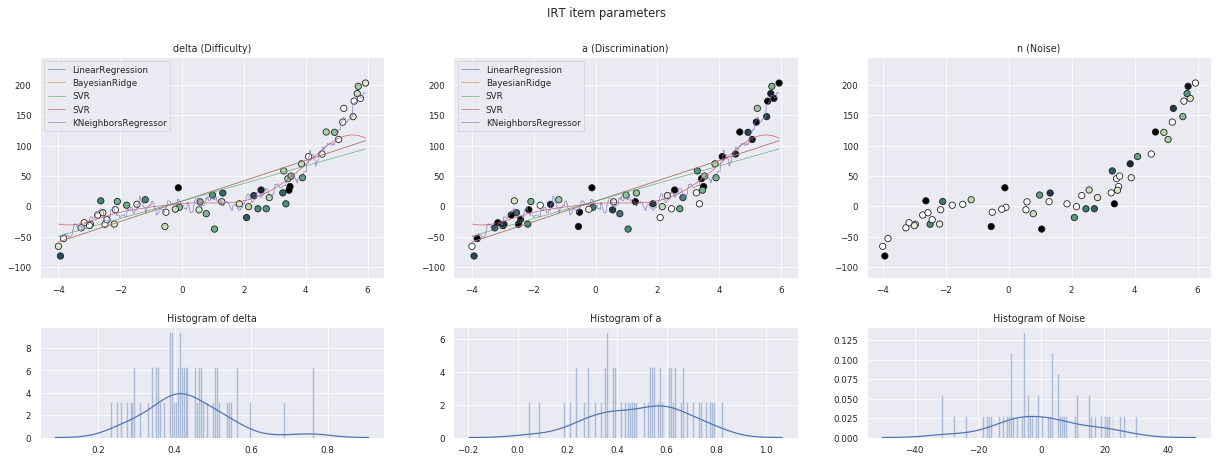

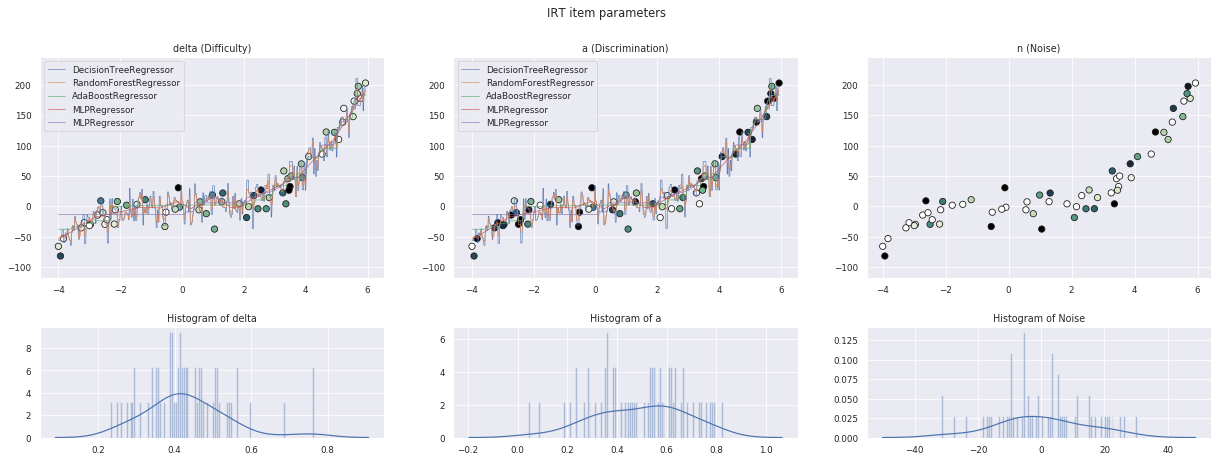

In [24]:
for i, l in enumerate([slice(0, 5, 1), slice(5, 10, 1)]):
    if noise_std > 0:
        f = plot_parameters(concat, delta = difficulty, a = discrimination, noise = noise, models= Irt.models[l], ylim= ylim)
    else:
        f = plot_parameters(concat, delta = difficulty, a = discrimination, models= Irt.models[l], ylim = ylim)
    f.savefig('./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std) + '/params_'+str(i+1)+'.png')

In [ ]:
chosen_i = [278, 203, 73, 237]

In [ ]:
plt.figure(figsize=(12, 12))
for sub, i in enumerate(chosen_i):
    plt.subplot(2, 2, sub+1)
    par = parameters.loc[i,:].values
    diff = par[0]
    disc = par[1]
    E = [beta_irt(x, diff, disc) for x in ab]
    middle = np.where(np.array(E)>0.499)[0][:2]
    p1 = [ab[middle[0]], E[middle[0]]]
    p2 = [ab[middle[1]], E[middle[1]]]
    newline(p1,p2)
    slope = (E[middle[1]] - E[middle[0]])/(ab[middle[1]] - ab[middle[0]])
    plt.text(p2[0], p2[1], 'slope = '+str(round(slope, 3)),fontsize=8)
    plt.plot(ab, E,)
    plt.plot([ab[middle[0]], ab[middle[0]]],[0, E[middle[0]]], '--r')
    plt.plot([0, ab[middle[0]]],[E[middle[0]], E[middle[0]]], '--r')
    plt.scatter(abilities['ability'].values[:-1], irt.loc[irt.index == i].values[0], marker= 'x', c = 'red')
    plt.ylabel('Response')
    plt.xlabel('Ability')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.title('Instance ' + str(i))
plt.savefig('./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std) + '/instances.png')

In [ ]:
plt.figure(figsize=(8, 6))
for sub, i in enumerate(chosen_i):
#     plt.subplot(2, 2, sub+1)
    par = parameters.loc[i,:].values
    diff = par[0]
    disc = par[1]
    E = np.array([beta_irt(x, diff, disc) for x in ab])
    Error = (1 - E)/E
    plt.plot(ab, Error, label = 'Instance ' + str(i))
#     plt.plot([ab[middle[0]], ab[middle[0]]],[0, E[middle[0]]], '--r')
#     plt.plot([0, ab[middle[0]]],[E[middle[0]], E[middle[0]]], '--r')
    err = irt.loc[irt.index == i].values[0]
#     plt.scatter(abilities['ability'].values[:-1], (1-err)/err, marker= 'x', c = 'red')
    plt.ylabel('Exp. Error')
    plt.xlabel('Ability')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 10.01])
#     plt.title('')
plt.legend()
plt.savefig('./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std) + '/error_ability.png')

## MAE x Ability

In [ ]:
mae = np.zeros(len(abilities)-1)
err_rel = np.absolute(y_test - y_test.mean())
for i, mod in enumerate(abilities.iloc[:-1, 0]):
    for j, rel in enumerate(err_rel):
        y = irt.iloc[j, i]
        mae[i] = mae[i] + ((1 - y)/y)*rel
mae = mae/len(y_test)
# mae = np.delete(mae, -1)

In [ ]:
mdls = ['LR', 'Bayes', 'SVR(Linear)', 'SVR(Rbf)', 'KNR', 'DT', 'RF', 'AdaB', 'MLP (100)', 'MLP (50-50)', 'Optimal', 'Average', 'Worst']
c_n = 'C0'
c_e = 'red'
color = [c_n, c_n,c_n,c_n,c_n,c_n,c_n,c_n,c_n,c_n,c_e,c_e,c_e]

In [ ]:
fig = plt.figure(figsize=(10,8))
ax = plt.axes()
# ax.plot(overview_data_x, overview_data_y)

ax.scatter(abilities.iloc[:-1, 1], mae, c= color)

ax.set_ylabel('Mean Absolute Error (MAE)')
ax.set_xlabel('Ability')
ax.set_xlim([0.299, 1.001])
ax.set_ylim([-.1, 70])
ax.set_title('Ability x MAE')

axins = zoomed_inset_axes(ax, 12, loc=1) # zoom-factor: 2.5, location: upper-left
axins.scatter(abilities.iloc[:-1, 1], mae, c= color)

#IMPORTANT LINE (SPECIFY LIMITS OF ZOOM)#
x1, x2, y1, y2 = 0.505, 0.525, 26, 28
#########################################

for i, txt in enumerate(mdls):
    if ( ((abilities.iloc[i, 1] > x1) & (abilities.iloc[i, 1] < x2) & (mae[i] > y1) & (mae[i] < y2)) ):
        axins.text(abilities.iloc[i, 1], mae[i], ' '+txt, fontsize=8)
    else:
        ax.text(abilities.iloc[i, 1], mae[i], ' '+txt, fontsize=7)
axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits
plt.xticks(visible=False)
plt.yticks(visible=False)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std) + '/mae_ability.png')
plt.show()

Moving IRT files to 'Results_IRT' folder:

In [ ]:
!mv {'./beta_irt/irt_data_' + name + '.csv'} {'./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std)+'/'}
!mv {'./beta_irt/xtest_' + name + '.csv'} {'./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std)+'/'}
!mv {'./beta_irt/errors_' + name + '.txt'} {'./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std)+'/'}
!mv {path + folder + 'irt_ability_vi_'+ name +'_am1@0_as1@0.csv'} {'./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std)+'/'}
!mv {path + folder + 'irt_parameters_vi_'+ name +'_am1@0_as1@0.csv'} {'./Results_IRT/' + name.split('_')[0] + '/noise_' + str(noise_std)+'/'}